In [1]:
# Run code which will save the center slice in the horizontal direction of the
# the rod
# Expected execution time is about about 2 minutes, writing to disk is bulk
# of the time here

!nvidia-smi
!nvcc  -o radicals -x cu -lnvToolsExt -I CLI11/include solverRadicals.cu
!./radicals -h

Sat Jul 15 06:17:56 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-12GB            Off| 00000000:65:00.0 Off |                    0 |
| N/A   42C    P0               28W / 250W|      0MiB / 12288MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!./radicals

Parameter                 Value
----------------------------------------
Diffusion coefficient     0.1
Radical formation rate    0.00025
Radical crosslinking rate 0.001
Radical oxidation rate    1
Dose rate                 1
Irradiation time          10000
Number of time steps      20000
Dimensions                (100, 100, 500)
Total number of steps     5000000
Number of slices          1000000000
Output file name prefix   output
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
0.59997 ms per step


In [3]:
!ls

CLI11		    compile.sh		radicals	   solverSaveSlice.cu
README.md	    jupy.sh		setup.sh	   test
RunDiffusion.ipynb  outputactivity.dat	solverRadicals.cu
RunRadDamage.ipynb  outputoxygen.dat	solverSaveFull.cu


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

In [5]:
plt.style.use(hep.style.ROOT)

In [6]:
data = np.fromfile("outputoxygen.dat", dtype=np.float32)
tDim = 20000
xDim = 100
yDim = 500
data = np.reshape(data,(tDim,yDim,xDim))

activity = np.fromfile("outputactivity.dat", dtype=np.float32)
tDim = 20000
xDim = 100
yDim = 500
activity = np.reshape(activity,(tDim,yDim,xDim))

26


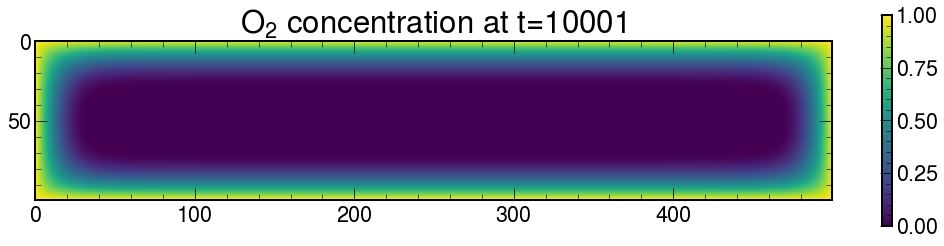

0.014890188


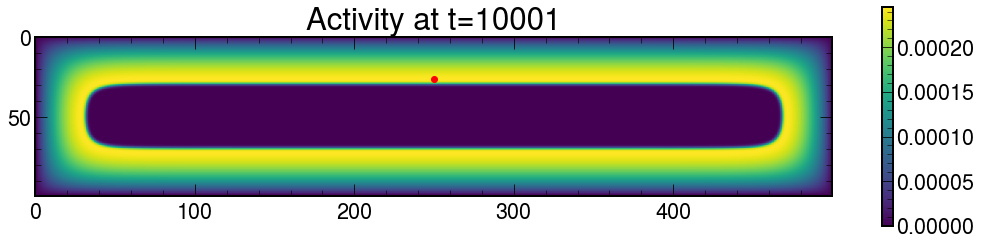

30


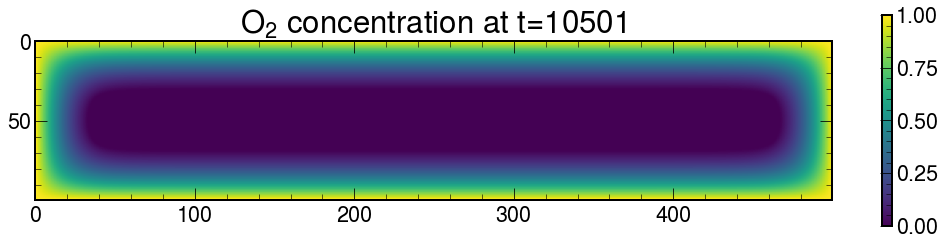

0.008579705


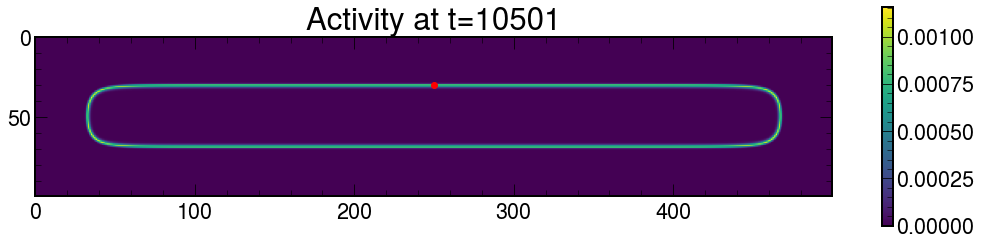

33


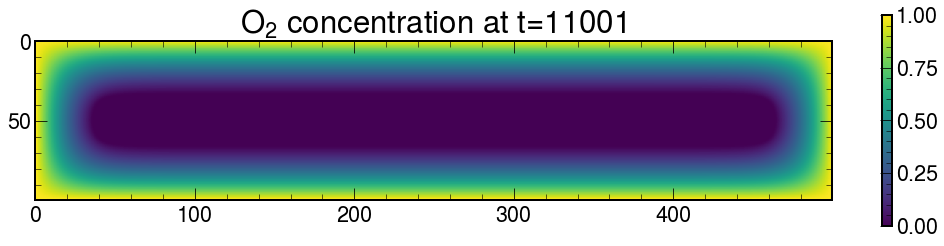

0.0038951007


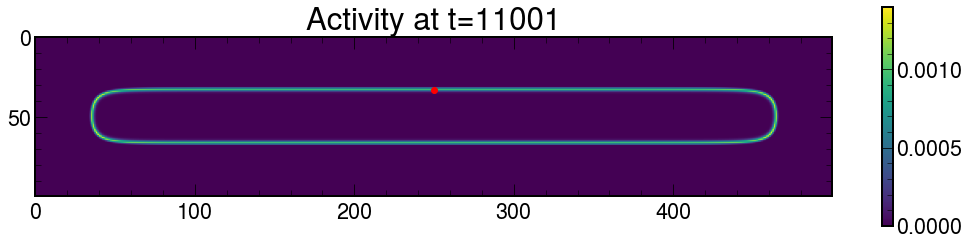

36


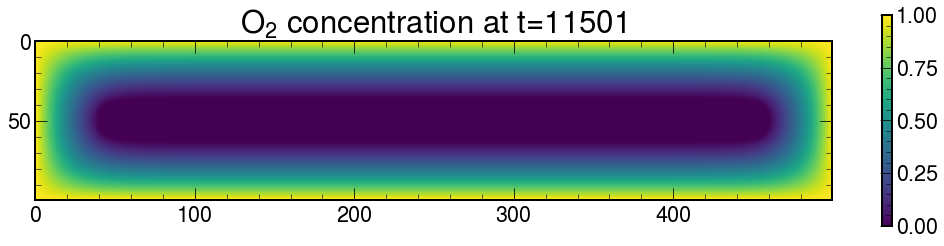

0.003838188


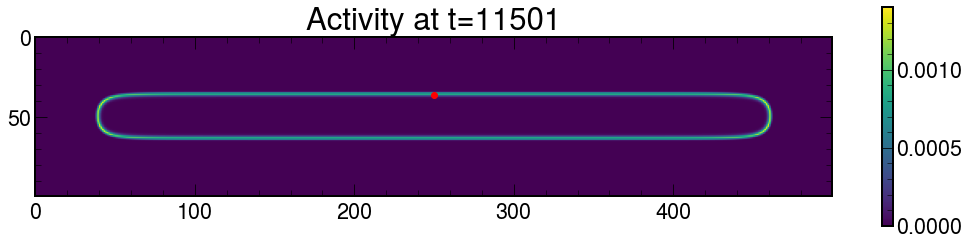

39


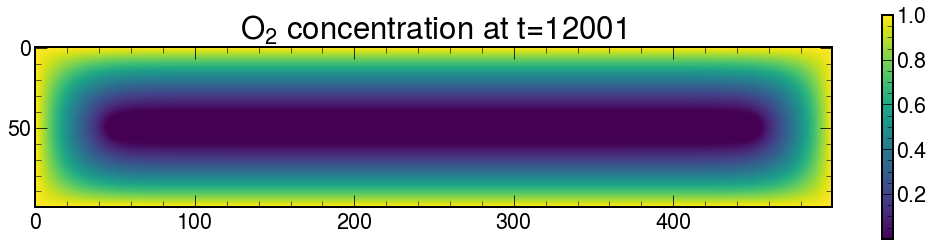

0.007209299


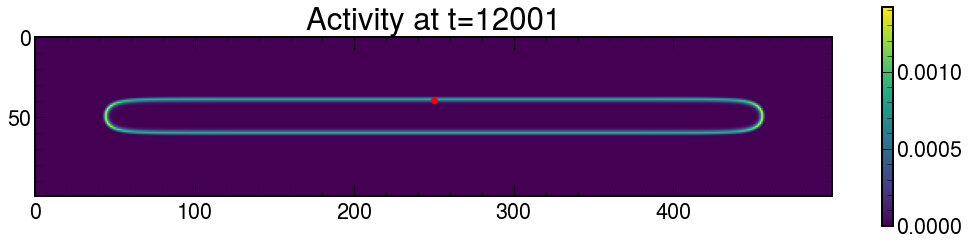

43


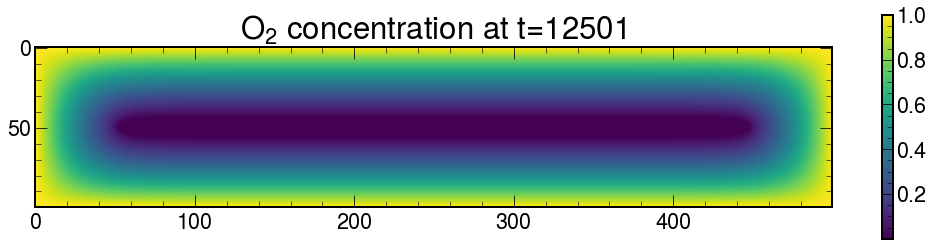

0.0073973406


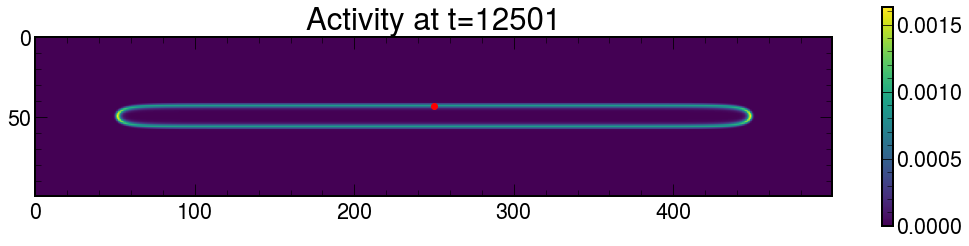

In [13]:
for time in range(10001, 13001, 500):
    #maximum = np.unravel_index(np.argmax(activity[time, 250, :]), activity.shape)
    maximum = np.argmax(activity[time, 250, :])
    print(maximum)
    
    fig, ax = plt.subplots(figsize=(15, 4))
    im = ax.imshow(data[time,:,:].T)
    fig.colorbar(im, ax=ax)
    ax.set_title(f"$O_2$ concentration at t={time}")
    fig.tight_layout()
    plt.show()
    
    print(data[time][250][maximum])

    fig, ax = plt.subplots(figsize=(15, 4))
    im = ax.imshow(activity[time,:,:].T)
    fig.colorbar(im, ax=ax)
    ax.set_title(f"Activity at t={time}")
    
    ax.plot(250, maximum, 'o', color='r')
    fig.tight_layout()
    plt.show()

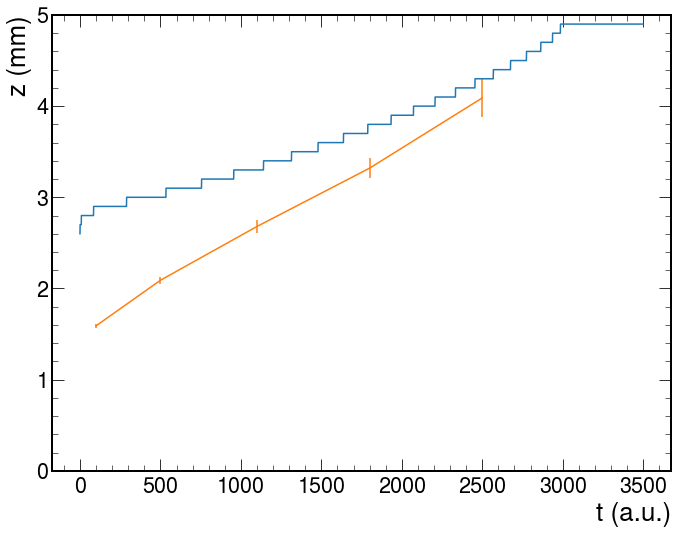

In [27]:
maximum = []
times = range(10001, 13500)
for time in times:
    maximum.append(np.argmax(activity[time, 250, :]))

times = np.array(times)
times = times - times[0]
maximum = np.array(maximum)
maximum = maximum/10

data_t = np.array([1, 5, 11, 18, 25])
data_et = np.ones_like(data_t) * 0.5
data_z = np.array([1.59, 2.09, 2.68, 3.32, 4.09])
data_ez = np.array([0.02, 0.04, 0.07, 0.11, 0.21])

# Days to a.u.
data_t = data_t * 100

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(times, maximum)
ax.errorbar(data_t, data_z, xerr=data_et, yerr=data_ez)
ax.set_ylim(0,5)
ax.set_ylabel("z (mm)")
ax.set_xlabel("t (a.u.)")
fig.tight_layout()
plt.show()

(20000, 500, 100)
(500, 100)


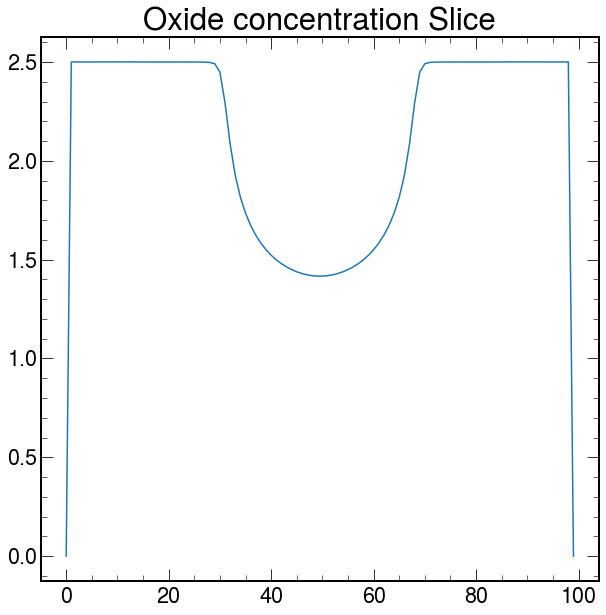

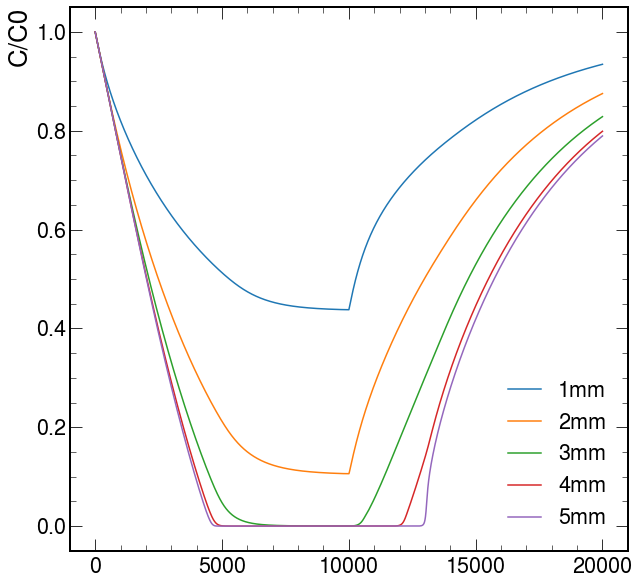

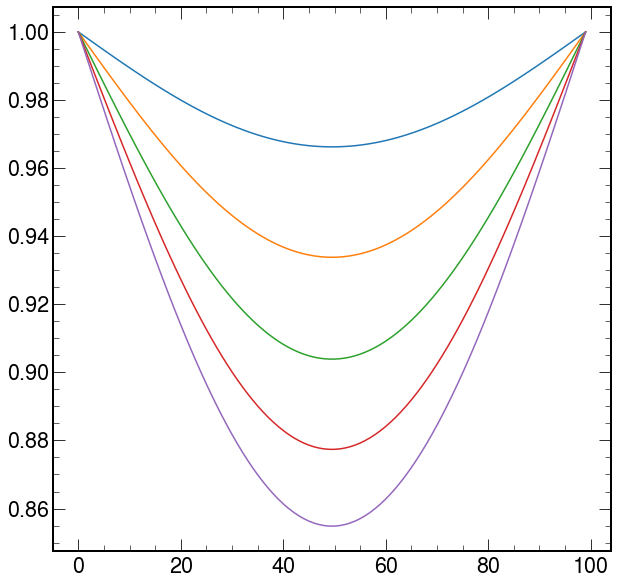

In [61]:
#activity = activity/np.amax(activity)
print(activity.shape)
oxideConcentration = np.sum(activity,axis=0)
print(oxideConcentration.shape)

plt.figure()
plt.plot(oxideConcentration[50,:])
plt.title("Oxide concentration Slice")
plt.show()

plt.figure()
plt.plot(data[:,250,10], label='1mm')
plt.plot(data[:,250,20], label='2mm')
plt.plot(data[:,250,30], label='3mm')
plt.plot(data[:,250,40], label='4mm')
plt.plot(data[:,250,50], label='5mm')
plt.ylabel("C/C0")
plt.legend()
plt.show()

plt.figure()
plt.plot(data[-1,10,:])
plt.plot(data[-1,20,:])
plt.plot(data[-1,30,:])
plt.plot(data[-1,40,:])
plt.plot(data[-1,50,:])
plt.show()

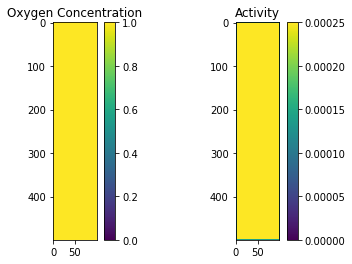

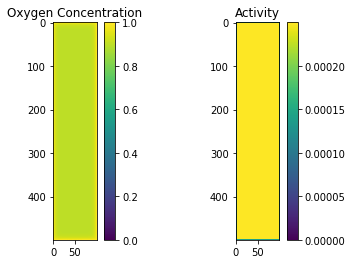

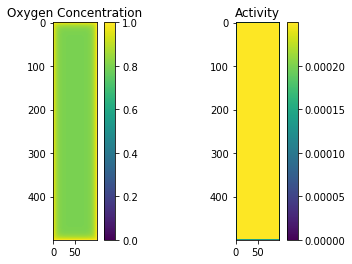

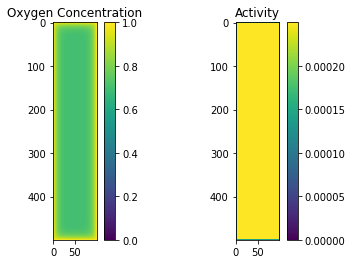

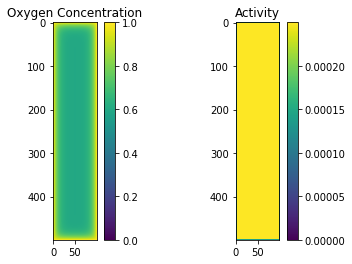

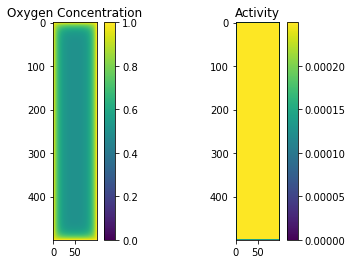

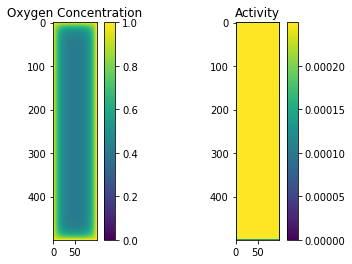

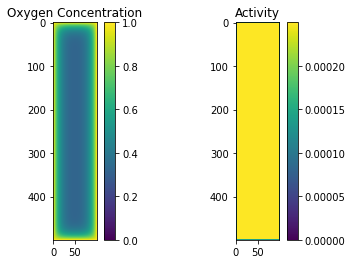

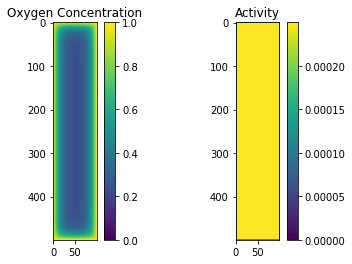

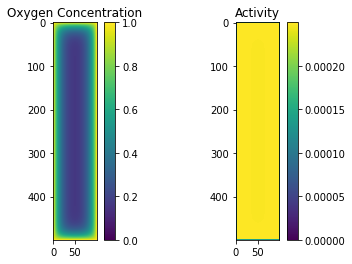

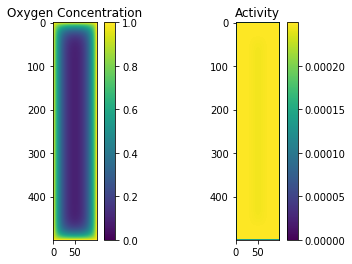

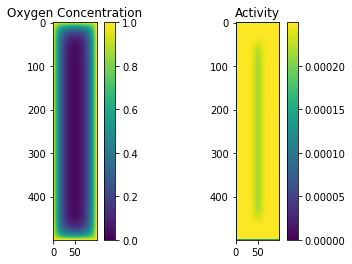

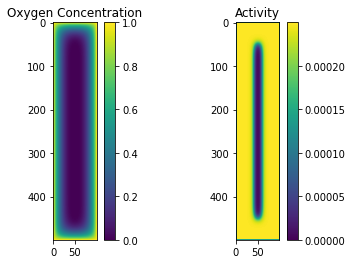

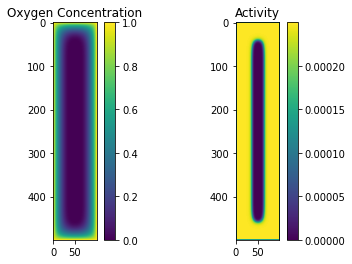

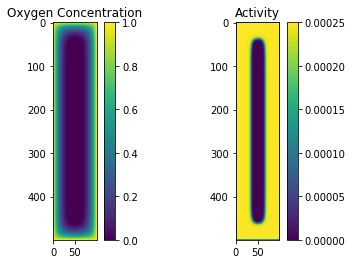

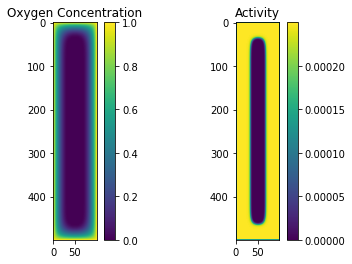

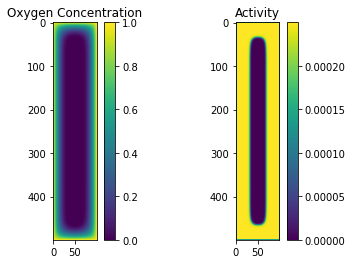

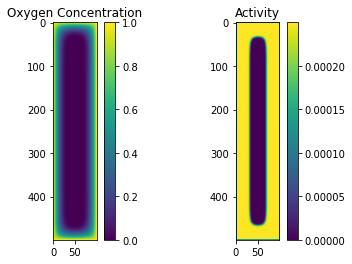

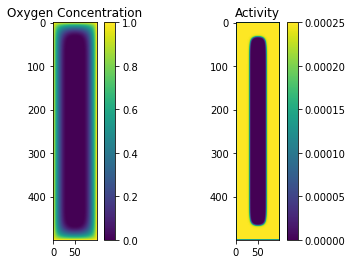

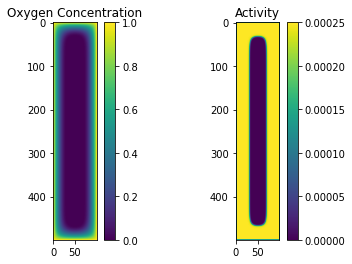

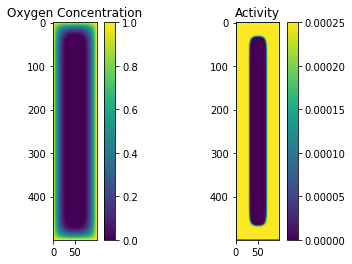

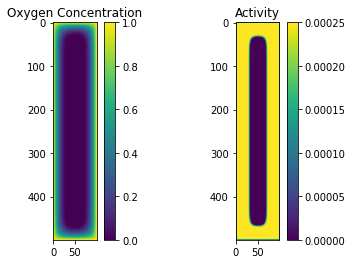

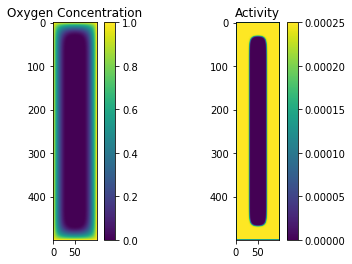

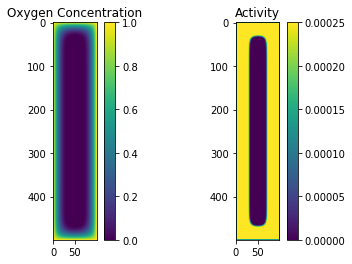

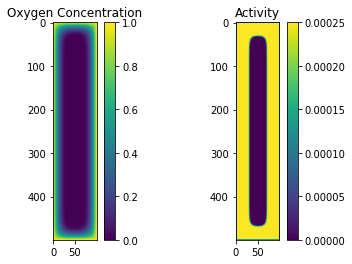

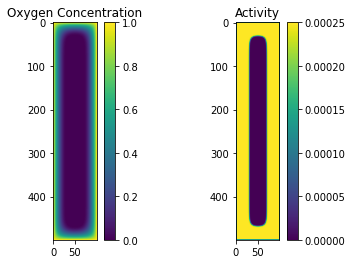

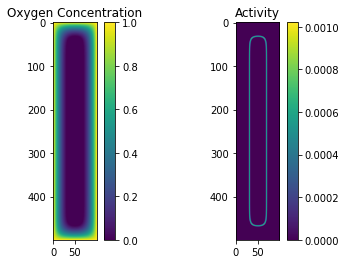

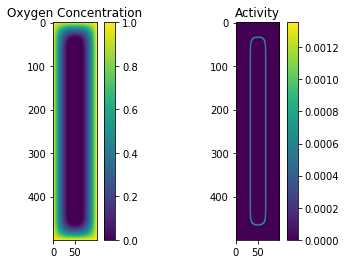

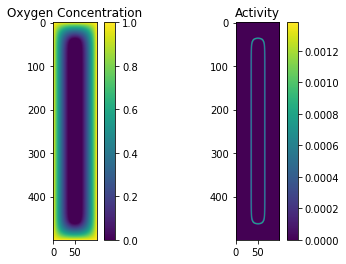

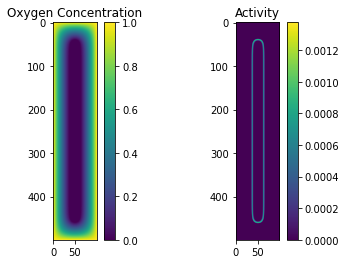

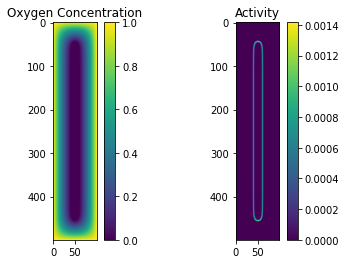

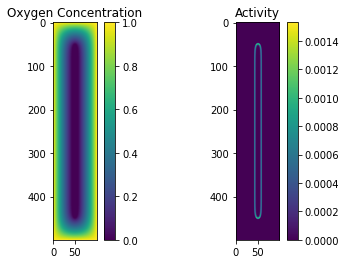

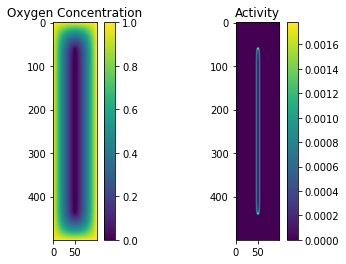

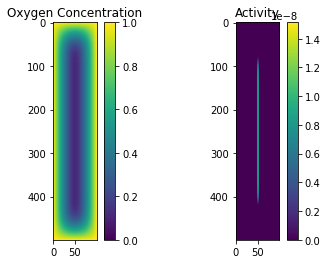

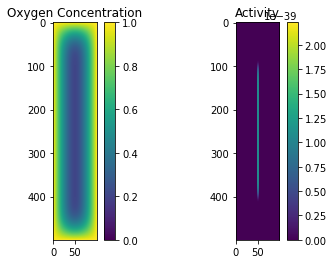

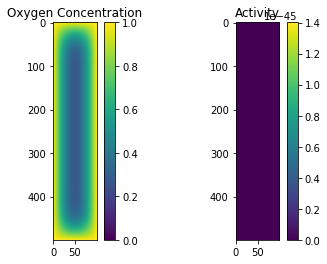

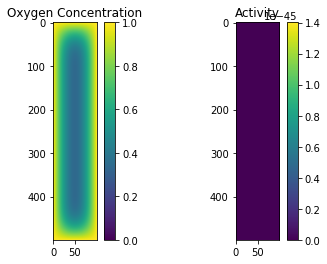

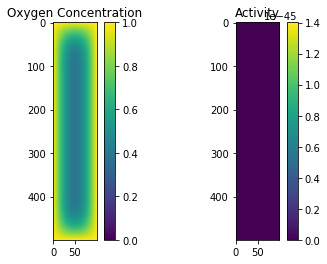

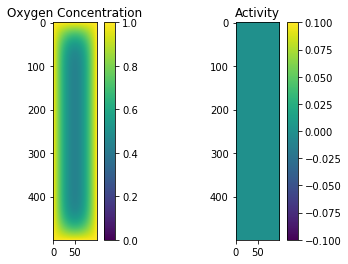

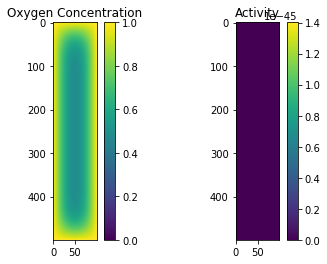

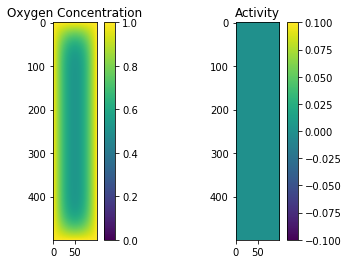

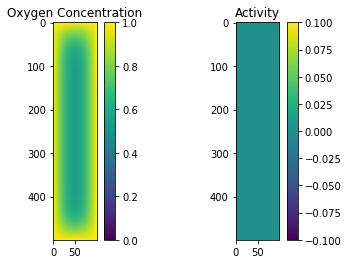

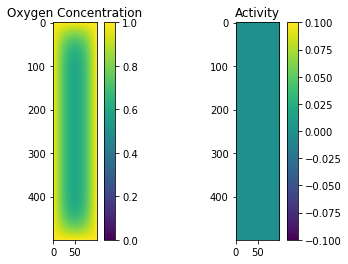

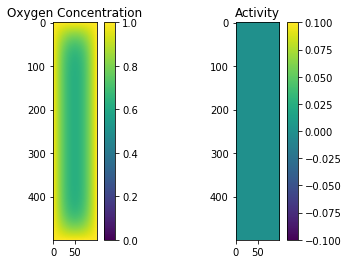

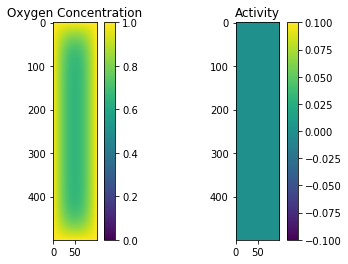

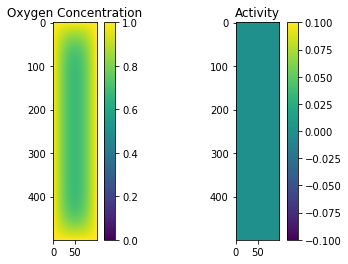

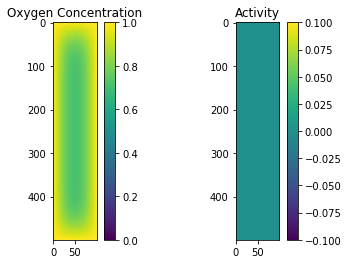

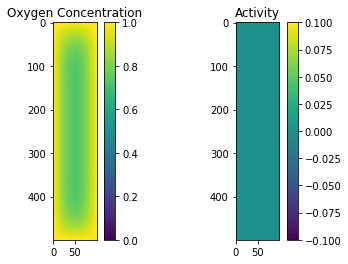

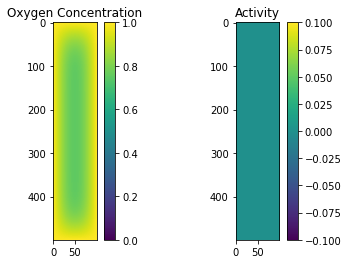

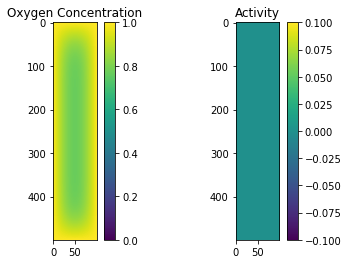

In [9]:
for x in range(50):
  plt.subplot(1, 2, 1)
  plt.imshow(data[x*tDim//50,:,:], vmin = 0, vmax=1)
  plt.colorbar()
  plt.title("Oxygen Concentration")

  plt.subplot(1, 2, 2)
  plt.imshow(activity[x*tDim//50,:,:], vmin = 0)
  plt.colorbar()
  plt.title("Activity")
  plt.show()
